In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from xgboost import XGBRegressor
import warnings

In [2]:
from catboost import CatBoostRegressor

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns=['math_score'],axis =1)

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
scaler= StandardScaler()
oh_trans = OneHotEncoder()
preprocessing = ColumnTransformer([
    ("OneHotEncoder", oh_trans,cat_features),
    ("standardScaler",scaler,num_features),
])

x = preprocessing.fit_transform(x)

In [10]:
x.shape

(1000, 19)

In [11]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [13]:
def evaluation_metrics(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square


In [14]:
models = {
    "Linear regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "k-NN regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Randomforest":RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Cat Boost":CatBoostRegressor(verbose=False),
    "xgboost regressor":XGBRegressor()
}
model_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = evaluation_metrics(y_train,y_train_pred)
    
    model_test_mae,model_test_mse, model_test_rmse, model_test_r2 = evaluation_metrics(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training set")
    print(" - Root mean squared error: {:.4f}".format(model_train_rmse))
    print(" - Mean absolute error: {:.4f}".format(model_train_mae))
    print(" - R2 score: {:.4f}".format(model_train_r2))

    print("--------------------------------------")

    print('Model performance for test set')
    
    print("Model Performance for training set")
    print(" - Root mean squared error: {:.4f}".format(model_test_rmse))
    print(" - Mean absolute error: {:.4f}".format(model_test_mae))
    print(" - R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear regression
Model Performance for training set
 - Root mean squared error: 5.3243
 - Mean absolute error: 4.2671
 - R2 score: 0.8743
--------------------------------------
Model performance for test set
Model Performance for training set
 - Root mean squared error: 5.3960
 - Mean absolute error: 4.2158
 - R2 score: 0.8803


Lasso
Model Performance for training set
 - Root mean squared error: 6.5938
 - Mean absolute error: 5.2063
 - R2 score: 0.8071
--------------------------------------
Model performance for test set
Model Performance for training set
 - Root mean squared error: 6.5197
 - Mean absolute error: 5.1579
 - R2 score: 0.8253


Ridge
Model Performance for training set
 - Root mean squared error: 5.3233
 - Mean absolute error: 4.2650
 - R2 score: 0.8743
--------------------------------------
Model performance for test set
Model Performance for training set
 - Root mean squared error: 5.3904
 - Mean absolute error: 4.2111
 - R2 score: 0.8806


k-NN regressor
Model Perform

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear regression,0.880345
6,Adaboost Regressor,0.852817
7,Cat Boost,0.851632
5,Randomforest,0.851339
8,xgboost regressor,0.827797
1,Lasso,0.825320
3,k-NN regressor,0.783813
4,Decision Tree,0.747574


In [20]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)


Accuracy of the model is 88.03


Text(0, 0.5, 'Predict')

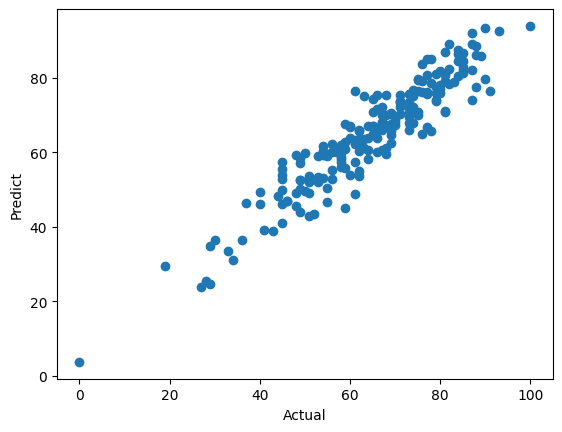

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')